<a href="https://colab.research.google.com/github/borhan-thais/simple_Prediction/blob/main/simple_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/modified_placement_data.csv')
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


In [ ]:
df.shape

(100, 3)

In [ ]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [ ]:
df.isnull().sum()

,0
cgpa,5
iq,0
placement,0


In [ ]:
# prompt: fill all null cgpa with previous value

df['cgpa']=df['cgpa'].fillna(method='ffill')

<ipython-input-6-bef9ce0ea20d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cgpa']=df['cgpa'].fillna(method='ffill')


In [ ]:
df.head()

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No


In [ ]:
df.isnull().sum()

,0
cgpa,0
iq,0
placement,0


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['placement']=df['placement'].map({'Yes':1,'No':0})

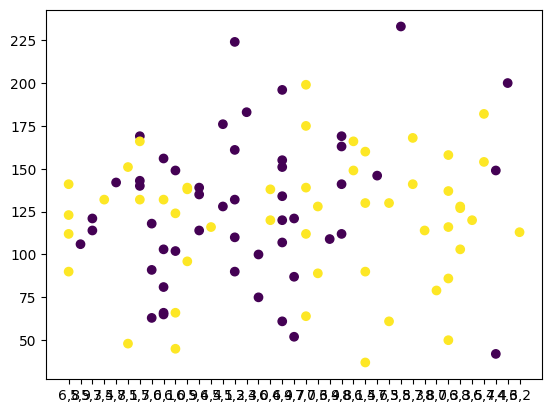

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
df['cgpa'] = df['cgpa'].str.replace(',', '.').astype(float)

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
X=df.iloc[:,0:2] # picking all rows and first 2 columns

In [ ]:
Y=df.iloc[:,-1] #picking last column and all rows

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [ ]:
X_test

,cgpa,iq
4,"5,8",142.0
1,"5,9",106.0
44,"7,5",61.0
28,"5,2",90.0
21,"7,1",151.0
0,"6,8",123.0
84,"5,7",169.0
82,"6,5",37.0
29,"7,0",112.0
94,"4,7",52.0


In [ ]:
X_train['cgpa'].dtype

dtype('float64')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 1.78275848, -1.08596508],
       [-0.73919254,  1.31415521],
       [ 0.3043734 , -0.49212088],
       [ 0.47830106, -2.12519242],
       [ 0.82615637,  0.3739019 ],
       [-0.9131202 , -0.07148125],
       [-1.00008403, -0.26942931],
       [-0.9131202 ,  1.80902537],
       [ 0.47830106,  0.91825908],
       [ 0.65222871,  1.46261626],
       [-0.82615637, -0.12096826],
       [ 0.65222871,  0.76979803],
       [ 0.56526488,  0.3739019 ],
       [-0.65222871,  2.5018436 ],
       [ 1.43490317,  0.12646682],
       [ 0.3043734 ,  0.12646682],
       [ 0.04348191,  0.64608049],
       [-1.43490317,  1.90799941],
       [ 1.00008403,  0.69556751],
       [-1.78275848, -0.34365984],
       [ 2.21757762, -0.07148125],
       [-2.30454145,  1.48735977],
       [ 2.04364997,  0.44813243],
       [ 1.17401168,  0.86877206],
       [-1.00008403,  0.44813243],
       [-0.9131202 , -1.53134823],
       [ 0.13044574,  0.22544085],
       [-0.9131202 ,  0.27492787],
       [ 0.04348191,

In [ ]:
# using logistic regression to train the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#model evaluation
x_pred=model.predict(X_test)

In [ ]:
Y_test

,placement
87,1
55,1
29,1
36,0
47,0
34,0
61,1
77,1
65,1
0,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,x_pred)

0.9

<Axes: >

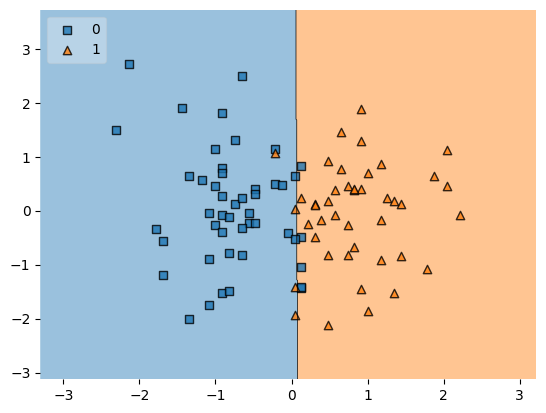

In [ ]:
# drwaing decision boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values,clf=model,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))